# Diabetes Prediction using Machine Learning
## A Data Science Individual Projects

#### Scripted by : Rafka Imanda Putra

#### dataset : https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Data Understanding

Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Acknowledgements

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

Inspiration

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

### Column Understanding

Pregnancies
Number of times pregnant

Glucose
Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure
Diastolic blood pressure (mm Hg)

SkinThickness
Triceps skin fold thickness (mm)

Insulin
2-Hour serum insulin (mu U/ml)

BMI
Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction
Diabetes pedigree function

Age
Age (years)

Outcome
Class variable (0 or 1) 268 of 768 are 1, the others are 0

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Checking Distribution of Outcome

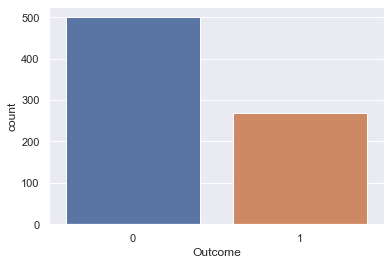

In [8]:
sns.countplot(df['Outcome']);

# Exploratory Data Analysis

Hello! You can skip this quite long section, basically here I see the pattern of the data againts the target class and fix some pretty extreme outliers. Here I also do the regression modelling to predict zero values of SkinThickness and Insulin.

Again, you can skip this section and go straight to the modelling section if you want to see the results quickly.

Best Regard, Rafka

In [9]:
class Aggregation:
    
    def __init__(self):
        pass
        
    
    def positive_percentage(self, data):
        true = data.sum()
        count = data.count()
        return ('{0:1.2f}'.format((true / count) * 100))
    
    def total_true(self, data):
        return data.sum()
    
    def length_data_true(self, data):
        return data.shape[0]
        
    def total_data(self, data):
        return data.count()

I defined the Aggregation class to make it easier to see the distribution of each quartile of the data column to the target class. Similar to "pd.crosstab", but this one is more insightful. And I will always use it to see the pattern of all feature columns.

In [10]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


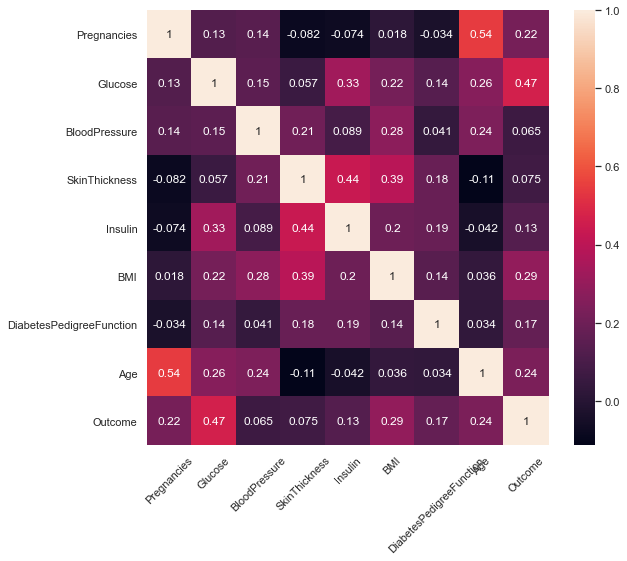

In [11]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

### Pregnancies column

In [12]:
agg = Aggregation()
preg = df.groupby(['Pregnancies'])['Outcome'].agg([agg.total_data, agg.total_true, agg.positive_percentage])
preg = preg.reset_index()
preg['Pregnancies'] = preg['Pregnancies'].apply(lambda x : str(x))
preg['positive_percentage'] = preg['positive_percentage'].apply(lambda x : float(x))

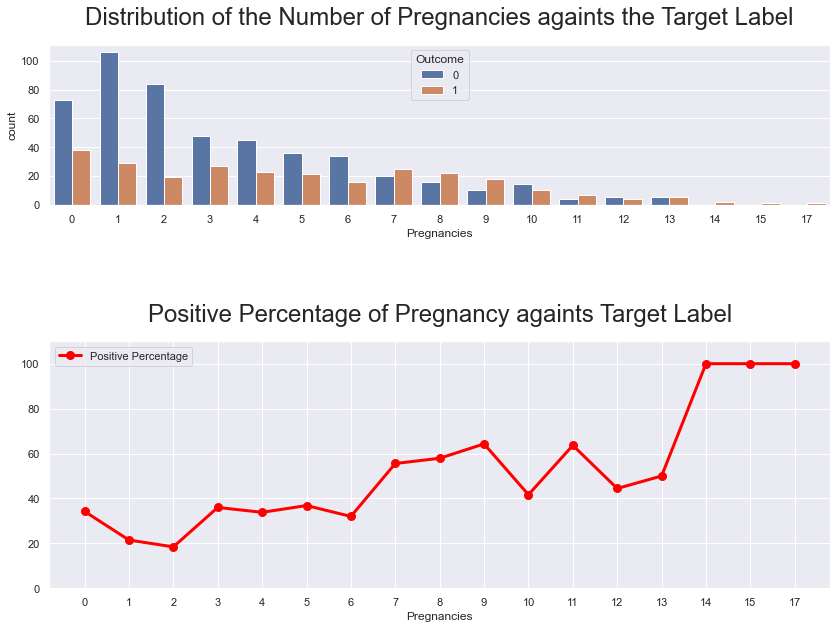

In [13]:
plt.figure(figsize=(14,10))

plt.subplot(311)
sns.countplot('Pregnancies', hue='Outcome', data=df)
plt.title('Distribution of the Number of Pregnancies againts the Target Label', pad=20, fontsize=24)

print('\n')

#plt.figure(figsize=(14,10))

plt.subplot(212)
plt.plot(preg['Pregnancies'], preg['positive_percentage'], ls='-', lw=3, marker='o', mew=3, color='red', label='Positive Percentage')
plt.title('Positive Percentage of Pregnancy againts Target Label', pad=20, fontsize=24)
plt.xlabel('Pregnancies')
plt.ylabel('')
plt.ylim(ymin=0, ymax=110)
plt.legend()
plt.show()

In [14]:
df['Pregnancies'].replace([i for i in range(0,18)], [0, 1,1, 4,4,4,4, 8,8,8, 11,11,11,11,11,11,11,11], inplace=True)

In [15]:
pd.crosstab(df['Outcome'], df['Pregnancies'])

Pregnancies,0,1,4,8,11
Outcome,,,,,
0,73,190,163,46,28
1,38,48,87,65,30


In [16]:
preg = df.groupby(['Pregnancies'])['Outcome'].agg([agg.total_data, agg.total_true, agg.positive_percentage])
preg = preg.reset_index()
preg['Pregnancies'] = preg['Pregnancies'].apply(lambda x : str(x))
preg['positive_percentage'] = preg['positive_percentage'].apply(lambda x : float(x))
preg

,Pregnancies,total_data,total_true,positive_percentage
0,0,111,38,34.23
1,1,238,48,20.17
2,4,250,87,34.80
3,8,111,65,58.56
4,11,58,30,51.72


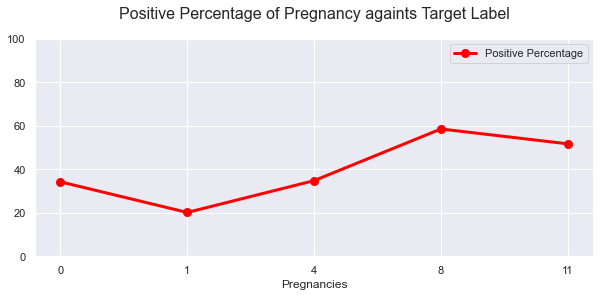

In [17]:
plt.figure(figsize=(10,4))

plt.plot(preg['Pregnancies'], preg['positive_percentage'], ls='-', lw=3, marker='o', mew=3, color='red', label='Positive Percentage')

plt.title('Positive Percentage of Pregnancy againts Target Label', pad=20, fontsize=16)
plt.xlabel('Pregnancies')
plt.ylabel('')

plt.ylim(ymin=0, ymax=100)
plt.legend()

plt.show()

### Glucose column

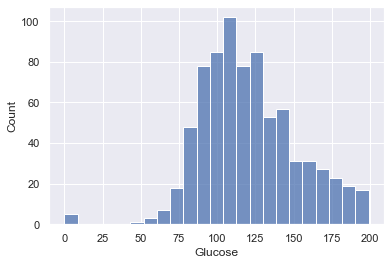

In [18]:
sns.histplot(df['Glucose']);

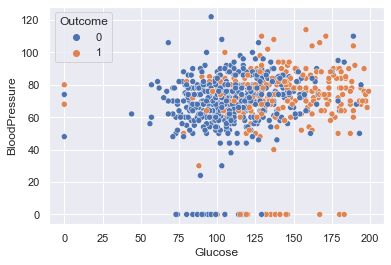

In [19]:
sns.scatterplot('Glucose', 'BloodPressure', hue='Outcome', data=df);

In [20]:
Glucose = []

for i in df['Glucose'].values:
    if i == 0:
        Glucose.append(df['Glucose'].mean())
    else:
        Glucose.append(i)

In [21]:
Glucose = pd.Series(Glucose)
df['Glucose'] = Glucose

In [22]:
df['Glucose'].describe()

count    768.000000
mean     121.681605
std       30.436016
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

<AxesSubplot:xlabel='Glucose'>

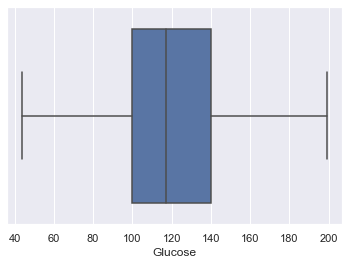

In [23]:
sns.boxplot(df['Glucose'])

In [24]:
glucose = df[['Glucose', 'Outcome']].copy()
glucose['Glucose'] = pd.qcut(glucose['Glucose'], q=7,
                           labels=['Range 44-90','Range 90-102','Range 102-111','Range 111-123',
                                   'Range 123-136','Range136-158','Range 158-199'])

Previously I've tried to run cells without annotating labels, after that I annotated labels to make analysis easier

In [25]:
pd.crosstab(glucose['Outcome'], glucose['Glucose'])

Glucose,Range 44-90,Range 90-102,Range 102-111,Range 111-123,Range 123-136,Range136-158,Range 158-199
Outcome,,,,,,,
0,103,105,76,82,58,57,19
1,7,16,22,35,46,57,85


In [26]:
glucose2 = glucose.groupby('Glucose')['Outcome'].agg([agg.total_data, agg.total_true, agg.positive_percentage])
glucose2 = glucose2.reset_index()
glucose2['positive_percentage'] = glucose2['positive_percentage'].apply(lambda x : float(x))
glucose2

,Glucose,total_data,total_true,positive_percentage
0,Range 44-90,110,7,6.36
1,Range 90-102,121,16,13.22
2,Range 102-111,98,22,22.45
3,Range 111-123,117,35,29.91
4,Range 123-136,104,46,44.23
5,Range136-158,114,57,50.00
6,Range 158-199,104,85,81.73


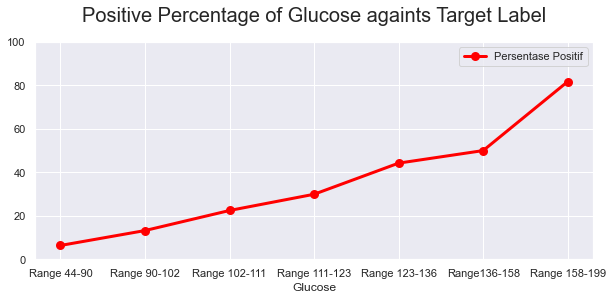

In [27]:
plt.figure(figsize=(10,4))
plt.plot(glucose2['Glucose'], glucose2['positive_percentage'], ls='-', lw=3, marker='o', mew=3, color='red', label='Persentase Positif')
plt.title('Positive Percentage of Glucose againts Target Label', pad=20, fontsize=20)
plt.xlabel('Glucose')
plt.ylabel('')
plt.ylim(ymin=0, ymax=100)
plt.legend()

plt.show()

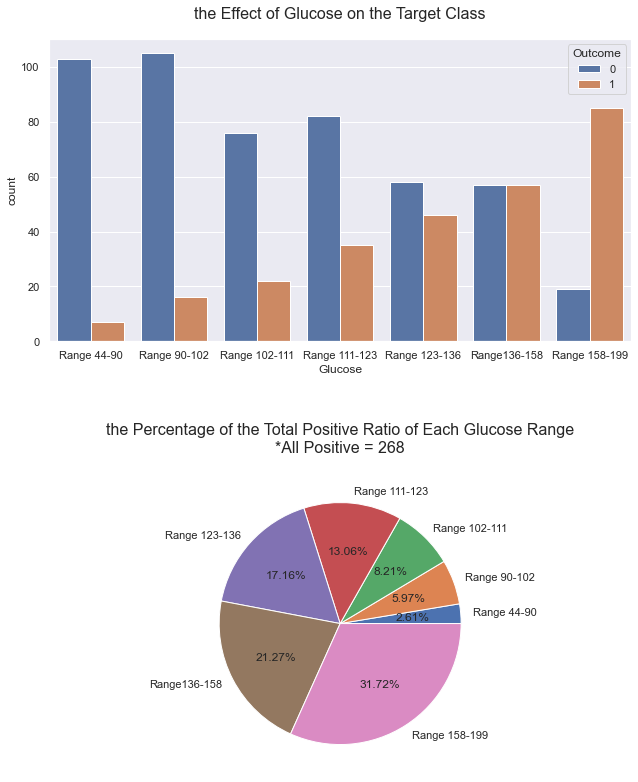

In [28]:
plt.figure(figsize=(10,12))

plt.subplot(211)
sns.countplot('Glucose', hue='Outcome', data=glucose)
plt.title('the Effect of Glucose on the Target Class', pad=20, fontsize=16)

print('\n')

plt.subplot(212)
plt.pie(glucose2['total_true'], labels=glucose2['Glucose'], autopct='%1.2f%%')
plt.title('the Percentage of the Total Positive Ratio of Each Glucose Range\n*All Positive = {}'
          .format(len(df[df['Outcome']==1])), pad=20, fontsize=16)

plt.tight_layout(pad=4)
plt.show()

### BloodPressure column

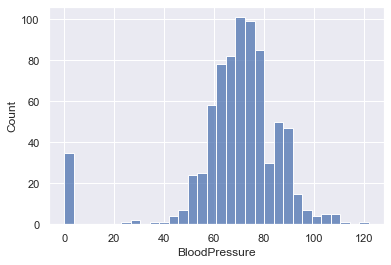

In [29]:
sns.histplot(df['BloodPressure']);

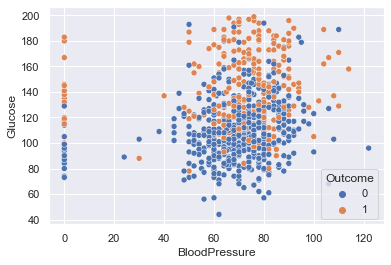

In [30]:
sns.scatterplot('BloodPressure', 'Glucose', hue='Outcome', data=df);

In [31]:
BP = []

for i in df['BloodPressure'].values:
    if i == 0:
        BP.append(df['BloodPressure'].median())
    else:
        BP.append(i)

In [32]:
BP = pd.Series(BP)
df['BloodPressure'] = BP

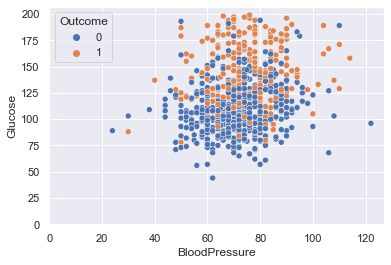

In [33]:
sns.scatterplot('BloodPressure', 'Glucose', hue='Outcome', data=df)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

In [34]:
df['BloodPressure'].describe()

count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

<AxesSubplot:xlabel='BloodPressure'>

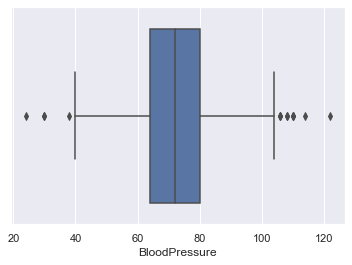

In [35]:
sns.boxplot(df['BloodPressure'])

In [36]:
upper = df['BloodPressure'].quantile(0.75) + 1.5 * (df['BloodPressure'].quantile(0.75) - df['BloodPressure'].quantile(0.25))
lower = df['BloodPressure'].quantile(0.25) - 1.5 * (df['BloodPressure'].quantile(0.75) - df['BloodPressure'].quantile(0.25))

print(f'Max = {upper}')
print(f'Min = {lower}')

Max = 104.0
Min = 40.0


In [37]:
BP = []

for i in df['BloodPressure'].values:
    if i > upper:
        BP.append(upper)
    elif i < lower:
        BP.append(lower)
    else:
        BP.append(i)
        
df['BloodPressure'] = pd.Series(BP)

In [38]:
np.linspace(df['BloodPressure'].min(), df['BloodPressure'].max(), 6)

array([ 40. ,  52.8,  65.6,  78.4,  91.2, 104. ])

In [39]:
BloodP = df[['BloodPressure', 'Outcome']].copy()
BloodP['BloodPressure'] = pd.cut(BloodP['BloodPressure'], bins=[40. , 52.8, 65.6, 78.4, 91.2, 104.],
                                labels=['Range 40-52','Range 52-65','Range 65-78','Range 78-91','Range 91-104'])

In [40]:
pd.crosstab(BloodP['Outcome'], BloodP['BloodPressure'])

BloodPressure,Range 40-52,Range 52-65,Range 65-78,Range 78-91,Range 91-104
Outcome,,,,,
0,26,132,224,95,20
1,9,36,131,72,18


In [41]:
BloodP2 = BloodP.groupby('BloodPressure')['Outcome'].agg([agg.total_data, agg.total_true, agg.positive_percentage])
BloodP2 = BloodP2.reset_index()
BloodP2

,BloodPressure,total_data,total_true,positive_percentage
0,Range 40-52,35,9,25.71
1,Range 52-65,168,36,21.43
2,Range 65-78,355,131,36.90
3,Range 78-91,167,72,43.11
4,Range 91-104,38,18,47.37


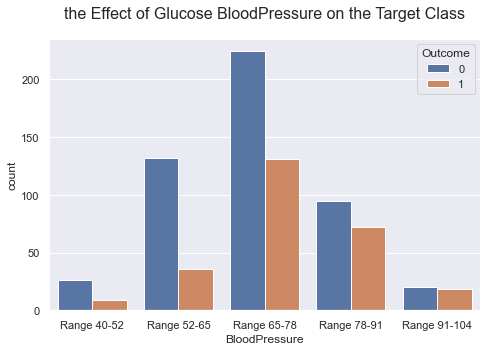

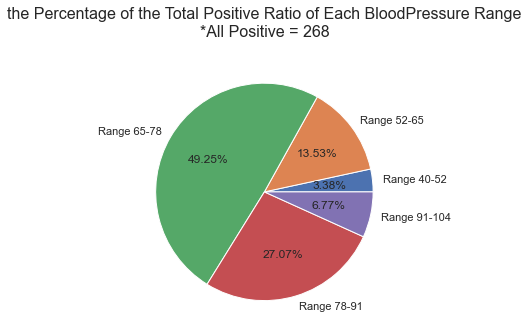

In [42]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.countplot('BloodPressure', hue='Outcome', data=BloodP)
plt.title('the Effect of Glucose BloodPressure on the Target Class', pad=20, fontsize=16)
plt.show()

print('\n')

plt.figure(figsize=(17,5))
plt.subplot(122)
plt.pie(BloodP2['total_true'], labels=BloodP2['BloodPressure'], autopct='%1.2f%%')
plt.title('the Percentage of the Total Positive Ratio of Each BloodPressure Range\n*All Positive = {}'
          .format(len(df[df['Outcome']==1])), pad=20, fontsize=16)
plt.show()

### SkinThickness column

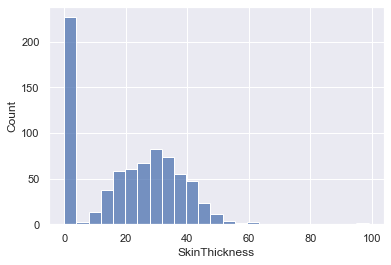

In [43]:
sns.histplot(df['SkinThickness'], bins=25);

<AxesSubplot:xlabel='SkinThickness'>

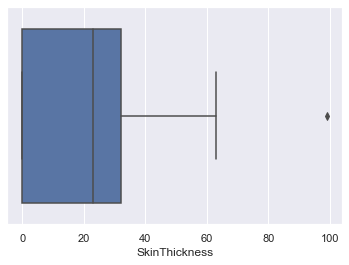

In [44]:
sns.boxplot(df['SkinThickness'])

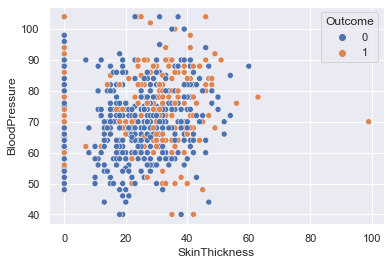

In [45]:
sns.scatterplot('SkinThickness', 'BloodPressure', hue='Outcome', data=df);

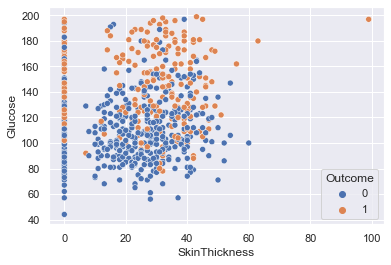

In [46]:
sns.scatterplot('SkinThickness', 'Glucose', hue='Outcome', data=df);

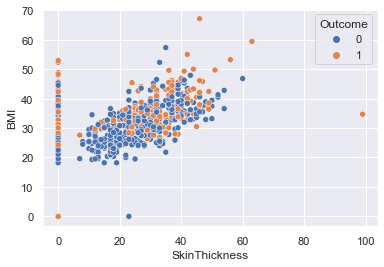

In [47]:
sns.scatterplot('SkinThickness', 'BMI', hue='Outcome', data=df);

In [48]:
df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [49]:
ST_0 = df[df['SkinThickness'] == 0]
ST_NOT_0 = df[df['SkinThickness'] != 0]
print(f'The number of SkinThickness is zero = {len(ST_0)}')
print(f'The number of SkinThickness is NOT zero = {len(ST_NOT_0)}')
print(f'Total SkinThickness = {df.shape[0]}')

The number of SkinThickness is zero = 227
The number of SkinThickness is NOT zero = 541
Total SkinThickness = 768


In [50]:
ST_NOT_0['SkinThickness'].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

<AxesSubplot:xlabel='SkinThickness'>

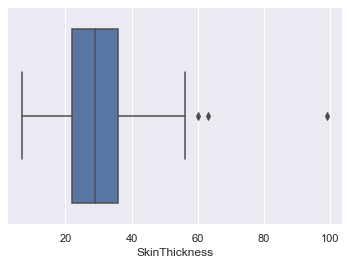

In [51]:
sns.boxplot(ST_NOT_0['SkinThickness'])

In [52]:
upper = ST_NOT_0['SkinThickness'].quantile(0.75) + 1.5 * (ST_NOT_0['SkinThickness'].quantile(0.75) - ST_NOT_0['SkinThickness'].quantile(0.25))
upper

57.0

In [53]:
skt = []

for i in df['SkinThickness'].values:
    if i >= 57:
        skt.append(57)
    else:
        skt.append(i)

In [54]:
df['SkinThickness'] = pd.Series(skt)

<AxesSubplot:xlabel='SkinThickness'>

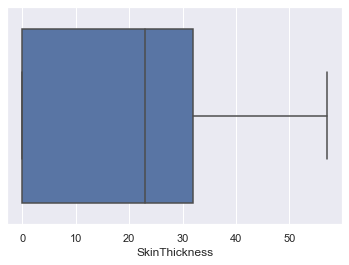

In [55]:
sns.boxplot(df['SkinThickness'])

In [56]:
ST_NOT_0 = df[df['SkinThickness'] != 0]

Target Class Distribution of Zero SkinThickness


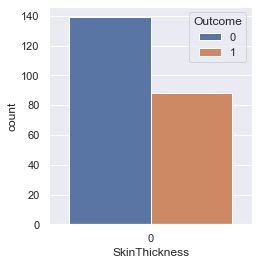



Target Class Distribution of Non-Zero SkinThickness


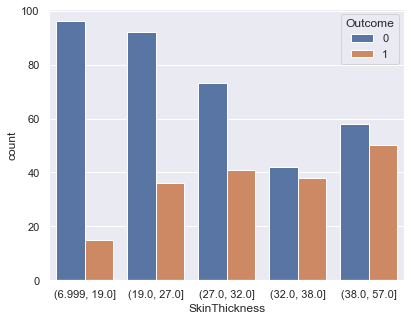

In [57]:
plt.figure(figsize=(8,4))
plt.subplot(121)
print('Target Class Distribution of Zero SkinThickness')
sns.countplot(ST_0['SkinThickness'], hue=ST_0['Outcome'])
plt.show()

plt.figure(figsize=(14,5))
plt.subplot(122)
print('\n\nTarget Class Distribution of Non-Zero SkinThickness')
ST_NOT_0['SkinThickness'] = pd.qcut(ST_NOT_0['SkinThickness'], q=5)
sns.countplot(ST_NOT_0['SkinThickness'], hue=ST_NOT_0['Outcome'])
plt.show()

In [58]:
ST_0 = ST_0.groupby('SkinThickness')['Outcome'].agg([agg.total_data, agg.total_true, agg.positive_percentage])
ST_0 = ST_0.reset_index()
print(ST_0)

print('')

ST_NOT_0 = ST_NOT_0.groupby('SkinThickness')['Outcome'].agg([agg.total_data, agg.total_true, agg.positive_percentage])
ST_NOT_0 = ST_NOT_0.reset_index()
print(ST_NOT_0)

   SkinThickness  total_data  total_true positive_percentage
0              0         227          88               38.77

   SkinThickness  total_data  total_true positive_percentage
0  (6.999, 19.0]         111          15               13.51
1   (19.0, 27.0]         128          36               28.12
2   (27.0, 32.0]         114          41               35.96
3   (32.0, 38.0]          80          38               47.50
4   (38.0, 57.0]         108          50               46.30


#### I will not continue exploring this column, there are 227 data values ​​zero, this is a bad thing, cannot be filled with median. Therefore I want to do a regression to determine how much the data is worth zero. But I'll do it at the end because there are a lot of other columns I have to look at and explore.

### Insulin column

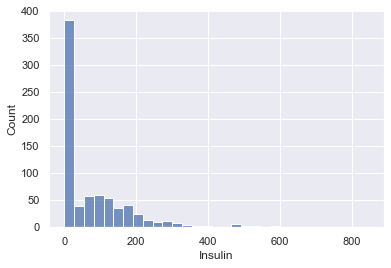

In [59]:
sns.histplot(df['Insulin']);

<AxesSubplot:xlabel='Insulin'>

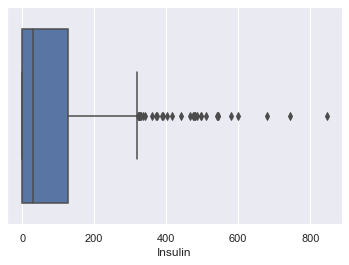

In [60]:
sns.boxplot(df['Insulin'])

In [61]:
df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

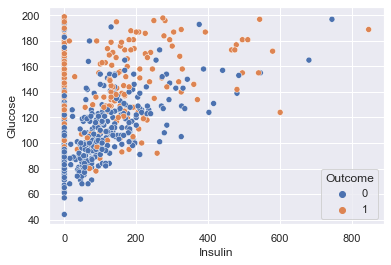

In [62]:
sns.scatterplot('Insulin', 'Glucose', hue='Outcome', data=df);

In [63]:
ins_zero = df[df['Insulin'] == 0]
ins_train = df[df['Insulin'] != 0]

In [64]:
ins_train['Insulin'].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [65]:
print('The amount of insulin is zero = {}'.format(len(ins_zero)))
print('The amount of insulin is not zero = {}'.format(len(ins_train)))

The amount of insulin is zero = 374
The amount of insulin is not zero = 394


<AxesSubplot:xlabel='Insulin'>

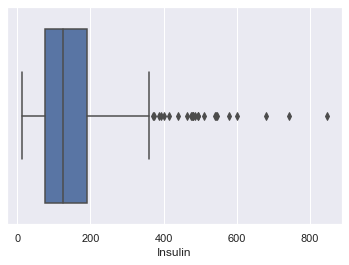

In [66]:
sns.boxplot(ins_train['Insulin'])

In [67]:
upper = ins_train['Insulin'].quantile(0.75) + 1.5 * (ins_train['Insulin'].quantile(0.75) - ins_train['Insulin'].quantile(0.25))
upper

360.625

In [68]:
ins = []

for i in df['Insulin'].values:
    if i >= 360.625:
        ins.append(200)
    else:
        ins.append(i)

In [69]:
df['Insulin'] = pd.Series(ins)

<AxesSubplot:xlabel='Insulin'>

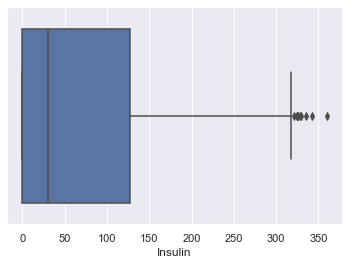

In [70]:
sns.boxplot(df['Insulin'])

In [71]:
ins_train = df[df['Insulin'] != 0]

<AxesSubplot:xlabel='Insulin'>

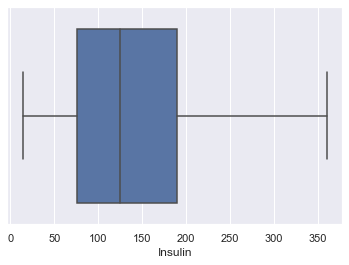

In [72]:
sns.boxplot(ins_train['Insulin'])

In [73]:
ins_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
6,4,78.0,50.0,32,88,31.0,0.248,26,1
8,1,197.0,70.0,45,200,30.5,0.158,53,1
13,1,189.0,60.0,23,200,30.1,0.398,59,1


In [74]:
ins_train['Insulin'].describe()

count    394.000000
mean     136.715736
std       73.768294
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      360.000000
Name: Insulin, dtype: float64

#### same as before, I will not continue exploring this column, there are 374 data values ​​zero, this is a bad thing, cannot be filled with median. Therefore I want to do a regression to determine how much the data is worth zero. But I'll do it at the end because there are a lot of other columns I have to look at and explore.

## Kolom BMI

In [75]:
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

<AxesSubplot:xlabel='BMI'>

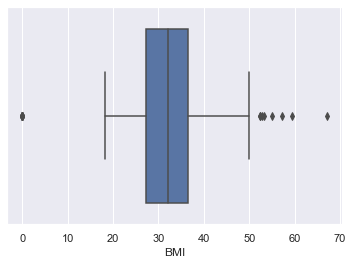

In [76]:
sns.boxplot(df['BMI'])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

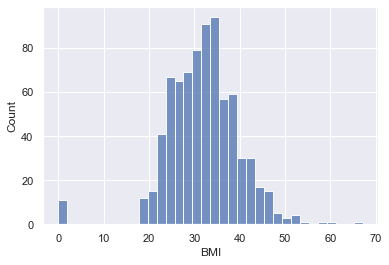

In [77]:
sns.histplot(df['BMI'])

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

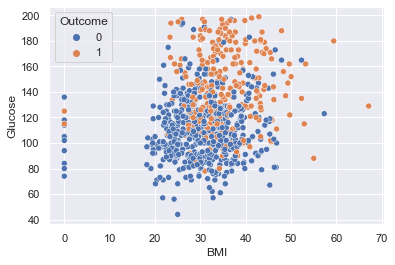

In [78]:
sns.scatterplot('BMI', 'Glucose', hue='Outcome', data=df)

In [79]:
bmi_not_0 = df[df['BMI'] != 0].copy()

In [80]:
bmi_not_0['BMI'].describe()

count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [81]:
upper = df['BMI'].quantile(0.75) + 1.5 * (df['BMI'].quantile(0.75) - df['BMI'].quantile(0.25))
lower = df['BMI'].quantile(0.25) - 1.5 * (df['BMI'].quantile(0.75) - df['BMI'].quantile(0.25))

print(f'Max = {upper}')
print(f'Min = {lower}')

Max = 50.550000000000004
Min = 13.35


In [82]:
bmi = []

for i in df['BMI'].values:
    if i == 0:
        bmi.append(bmi_not_0['BMI'].median())
    elif i > upper:
        bmi.append(upper)
    else:
        bmi.append(i)

In [83]:
df['BMI'] = pd.Series(bmi)

<AxesSubplot:xlabel='BMI'>

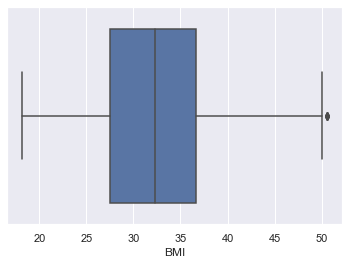

In [84]:
sns.boxplot(df['BMI'])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

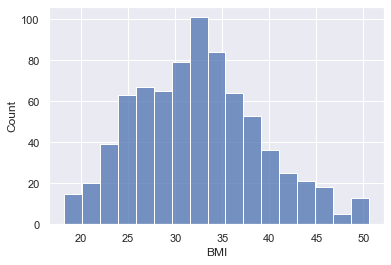

In [85]:
sns.histplot(df['BMI'])

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

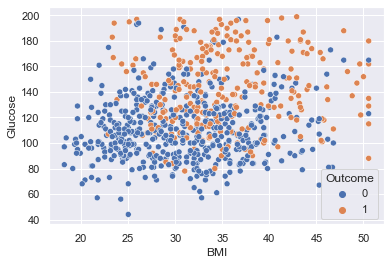

In [86]:
sns.scatterplot('BMI', 'Glucose', hue='Outcome', data=df)

In [87]:
np.linspace(18,50,6)

array([18. , 24.4, 30.8, 37.2, 43.6, 50. ])

In [88]:
bmi = df[['BMI', 'Outcome']].copy()
bmi['BMI'] = pd.cut(bmi['BMI'], bins=[18,24.4,30.8,37.2,43.6,50],
                     labels=['range 18-24', 'range 24-30', 'range 30-37', 'range 37-43', 'range 43-50'])

In [89]:
pd.crosstab(bmi['Outcome'], bmi['BMI'])

BMI,range 18-24,range 24-30,range 30-37,range 37-43,range 43-50
Outcome,,,,,
0,86,175,154,68,15
1,6,60,116,59,21


In [90]:
bmi2 = bmi.groupby('BMI')['Outcome'].agg([agg.total_data, agg.total_true, agg.positive_percentage])
bmi2 = bmi2.reset_index()
bmi2['positive_percentage'] = bmi2['positive_percentage'].apply(lambda x : float(x))
bmi2

,BMI,total_data,total_true,positive_percentage
0,range 18-24,92,6,6.52
1,range 24-30,235,60,25.53
2,range 30-37,270,116,42.96
3,range 37-43,127,59,46.46
4,range 43-50,36,21,58.33


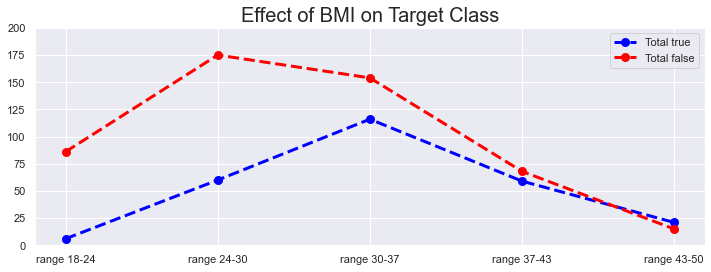

In [91]:
plt.figure(figsize=(12,4))
plt.title('Effect of BMI on Target Class', fontsize=20)
plt.plot(bmi2['BMI'], bmi2['total_true'], ls='--', lw=3, mew=3, marker='o', color='blue', label='Total true')
plt.plot(bmi2['BMI'], (bmi2['total_data'] - bmi2['total_true']), ls='--', lw=3, mew=3, marker='o', color='red', label='Total false')
plt.legend()
plt.ylim(ymin=0, ymax=200)
plt.show()

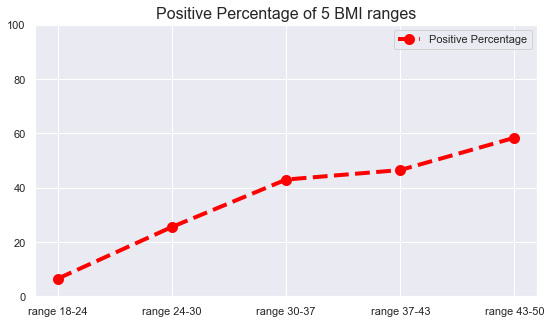

In [92]:
plt.figure(figsize=(9,5))
plt.plot(bmi2['BMI'], bmi2['positive_percentage'], lw=4, ls='--', marker='o', mew=5, color='red', label='Positive Percentage')
plt.title('Positive Percentage of 5 BMI ranges', fontsize=16)
plt.legend()
plt.ylim(ymin=0, ymax=100)
plt.show()

### DiabetesPedigreeFunction Column

In [93]:
df['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

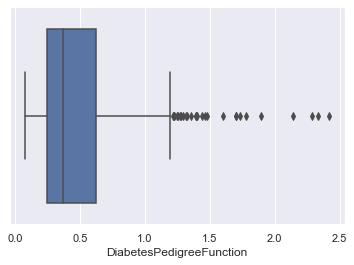

In [94]:
sns.boxplot(df['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

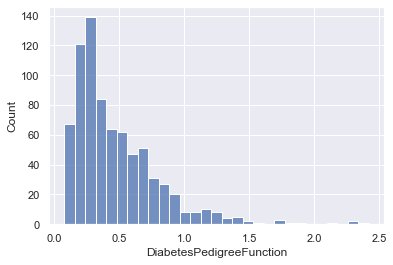

In [95]:
sns.histplot(df['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>

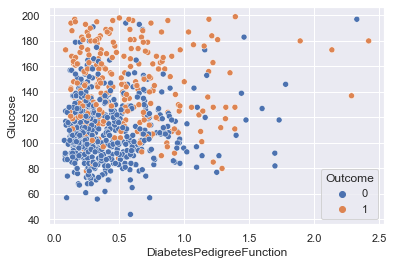

In [96]:
sns.scatterplot('DiabetesPedigreeFunction', 'Glucose', hue='Outcome', data=df)

In [97]:
upper = df['DiabetesPedigreeFunction'].quantile(0.75) + 1.5 * (df['DiabetesPedigreeFunction'].quantile(0.75) - df['DiabetesPedigreeFunction'].quantile(0.25))

print(f'Max = {upper}')

Max = 1.2


In [98]:
dpf = []

for i in df['DiabetesPedigreeFunction'].values:
    if i > upper:
        dpf.append(upper)
    else:
        dpf.append(i)

In [99]:
df['DiabetesPedigreeFunction'] = pd.Series(dpf)

In [100]:
df['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.458914
std        0.285596
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        1.200000
Name: DiabetesPedigreeFunction, dtype: float64

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

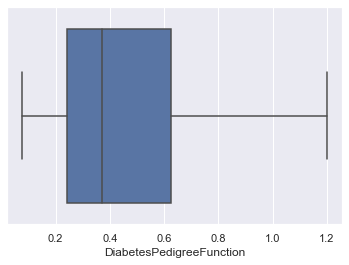

In [101]:
sns.boxplot(df['DiabetesPedigreeFunction'])

In [102]:
np.linspace(0.078, 1.2, 6)

array([0.078 , 0.3024, 0.5268, 0.7512, 0.9756, 1.2   ])

In [103]:
dpf = df[['DiabetesPedigreeFunction', 'Outcome']].copy()
dpf['DiabetesPedigreeFunction'] = pd.cut(dpf['DiabetesPedigreeFunction'], bins=[0.078, 0.3024, 0.5268, 0.7512, 0.9756, 1.2],
                                         labels=['range 0.07-0.30', 'range 0.30-0.52', 'range 0.52-0.75', 'range 0.75-0.97', 'range 0.97-1.20'])

In [104]:
pd.crosstab(dpf['Outcome'], dpf['DiabetesPedigreeFunction'])

DiabetesPedigreeFunction,range 0.07-0.30,range 0.30-0.52,range 0.52-0.75,range 0.75-0.97,range 0.97-1.20
Outcome,,,,,
0,222,136,85,33,23
1,84,64,60,31,29


In [105]:
dpf2 = dpf.groupby('DiabetesPedigreeFunction')['Outcome'].agg([agg.total_data, agg.total_true, agg.positive_percentage])
dpf2 = dpf2.reset_index()
dpf2['positive_percentage'] = dpf2['positive_percentage'].apply(lambda x : float(x))
dpf2['total_false'] = dpf2['total_data'] - dpf2['total_true']
dpf2

,DiabetesPedigreeFunction,total_data,total_true,positive_percentage,total_false
0,range 0.07-0.30,306,84,27.45,222
1,range 0.30-0.52,200,64,32.00,136
2,range 0.52-0.75,145,60,41.38,85
3,range 0.75-0.97,64,31,48.44,33
4,range 0.97-1.20,52,29,55.77,23


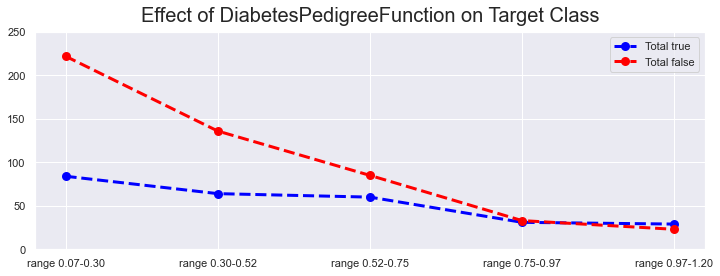

In [106]:
plt.figure(figsize=(12,4))
plt.title('Effect of DiabetesPedigreeFunction on Target Class', fontsize=20, pad=10)
plt.plot(dpf2['DiabetesPedigreeFunction'], dpf2['total_true'], ls='--', lw=3, mew=3, marker='o', color='blue', label='Total true')
plt.plot(dpf2['DiabetesPedigreeFunction'], (dpf2['total_data'] - dpf2['total_true']), ls='--', lw=3, mew=3, marker='o', color='red', label='Total false')
plt.legend()
plt.ylim(ymin=0, ymax=250)
plt.show()

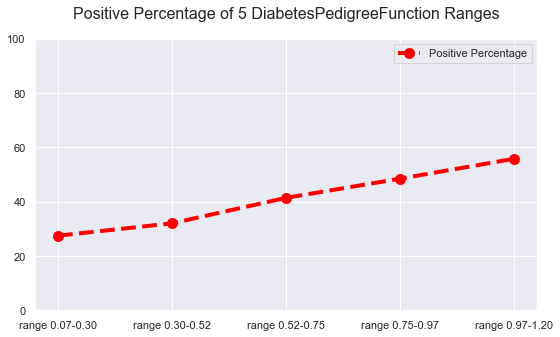

In [107]:
plt.figure(figsize=(9,5))
plt.plot(dpf2['DiabetesPedigreeFunction'], dpf2['positive_percentage'], lw=4, ls='--', marker='o', mew=5, color='red', label='Positive Percentage')
plt.title('Positive Percentage of 5 DiabetesPedigreeFunction Ranges', fontsize=16, pad=20)
plt.legend()
plt.ylim(ymin=0, ymax=100)
plt.show()

### Age Columns

In [108]:
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

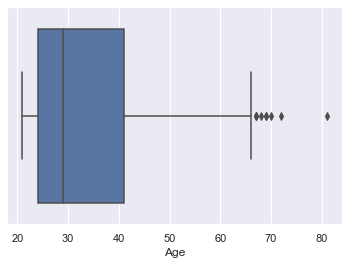

In [109]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

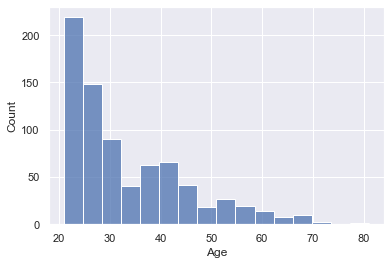

In [110]:
sns.histplot(df['Age'], bins=16)

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

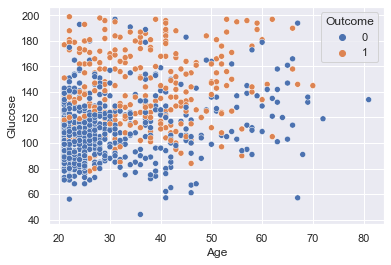

In [111]:
sns.scatterplot('Age', 'Glucose', hue='Outcome', data=df)

In [112]:
upper = df['Age'].quantile(0.75) + 1.5 * (df['Age'].quantile(0.75) - df['Age'].quantile(0.25))

print(f'Max = {upper}');

Max = 66.5


In [113]:
age = []

for i in df['Age'].values:
    if i > upper:
        age.append(upper)
    else:
        age.append(i)
        
df['Age']= pd.Series(age)

<AxesSubplot:xlabel='Age'>

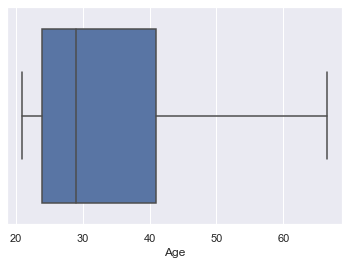

In [114]:
sns.boxplot(df['Age'])

In [115]:
df['Age'].describe()

count    768.000000
mean      33.199870
std       11.628404
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       66.500000
Name: Age, dtype: float64

In [116]:
np.linspace(21, 66.5, 6)

array([21. , 30.1, 39.2, 48.3, 57.4, 66.5])

In [117]:
age = df[['Age', 'Outcome']].copy()
age['Age'] = pd.cut(age['Age'], bins=[21, 30, 39, 48, 57, 66.6],
                                         labels=['range 21-30', 'range 30-39', 'range 39-48', 'range 48-57', 'range 57-66'])

In [118]:
pd.crosstab(age['Outcome'], age['Age'])

Age,range 21-30,range 30-39,range 39-48,range 48-57,range 57-66
Outcome,,,,,
0,269,74,51,20,28
1,85,70,62,32,14


In [119]:
age2 = age.groupby('Age')['Outcome'].agg([agg.total_data, agg.total_true, agg.positive_percentage])
age2 = age2.reset_index()
age2['positive_percentage'] = age2['positive_percentage'].apply(lambda x : float(x))
age2['total_false'] = age2['total_data'] - age2['total_true']
age2

,Age,total_data,total_true,positive_percentage,total_false
0,range 21-30,354,85,24.01,269
1,range 30-39,144,70,48.61,74
2,range 39-48,113,62,54.87,51
3,range 48-57,52,32,61.54,20
4,range 57-66,42,14,33.33,28


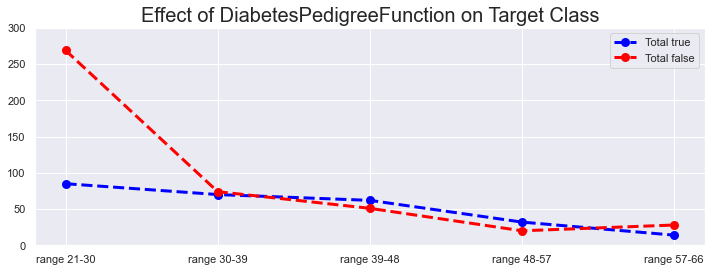

In [120]:
plt.figure(figsize=(12,4))
plt.title('Effect of DiabetesPedigreeFunction on Target Class', fontsize=20)
plt.plot(age2['Age'], age2['total_true'], ls='--', lw=3, mew=3, marker='o', color='blue', label='Total true')
plt.plot(age2['Age'], (age2['total_data'] - age2['total_true']), ls='--', lw=3, mew=3, marker='o', color='red', label='Total false')
plt.legend()
plt.ylim(ymin=0, ymax=300)
plt.show()

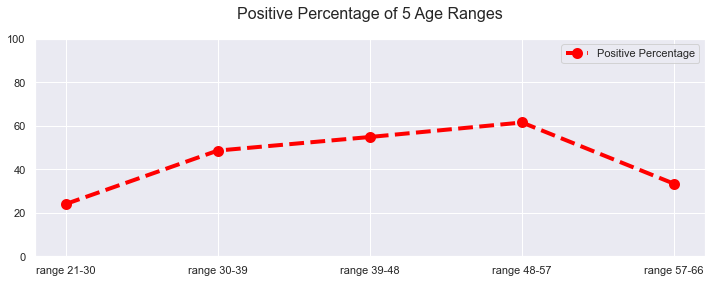

In [121]:
plt.figure(figsize=(12,4))
plt.plot(age2['Age'], age2['positive_percentage'], lw=4, ls='--', marker='o', mew=5, color='red', label='Positive Percentage')
plt.title('Positive Percentage of 5 Age Ranges', fontsize=16, pad=20)
plt.legend()
plt.ylim(ymin=0, ymax=100)
plt.show()

### Random Forest Regressor for Predict SkinThickness

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [123]:
st_test = df[df['SkinThickness'] == 0].copy()
st_train = df[df['SkinThickness'] != 0].copy()

In [124]:
st_test.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
5,4,116.0,74.0,0,0,25.6,0.201,30.0,0
7,11,115.0,72.0,0,0,35.3,0.134,29.0,0


In [125]:
st_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0


In [126]:
st_testing = st_test.drop(['SkinThickness', 'Insulin', 'Outcome'], axis=1)

In [127]:
st_X = st_train.drop(['SkinThickness', 'Insulin', 'Outcome'], axis=1)
st_y = st_train['SkinThickness']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(st_X, st_y, test_size=0.1, random_state=13)

In [129]:
model = RandomForestRegressor(max_depth=10,
                              n_jobs=100, 
                              random_state=33, 
                              max_samples=20, 
                              min_samples_leaf=4,
                              min_weight_fraction_leaf=0.1,
                              criterion='mae'
                             )

model.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=10, max_samples=20,
                      min_samples_leaf=4, min_weight_fraction_leaf=0.1,
                      n_jobs=100, random_state=33)

In [130]:
y_pred = model.predict(X_test)
mean_absolute_error(y_pred, y_test)

4.6143636363636364

In [131]:
skt_result = pd.DataFrame({'actual' : y_test, 'predicted' : y_pred})

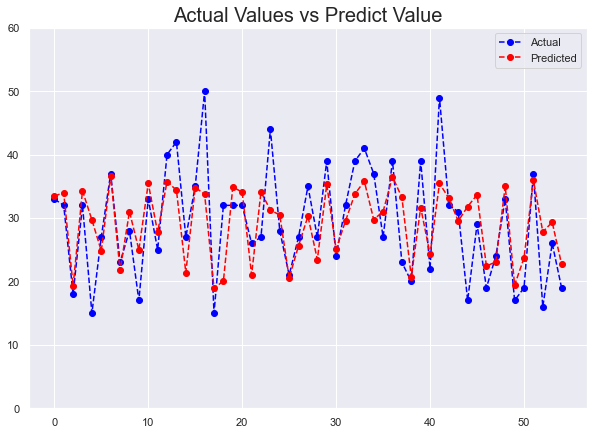

In [132]:
plt.figure(figsize=(10,7))
plt.title('Actual Values vs Predict Value', fontsize=20)
plt.plot(range(skt_result.shape[0]), skt_result['actual'], ls='--', marker='o', color='blue', label='Actual')
plt.plot(range(skt_result.shape[0]), skt_result['predicted'], ls='--', marker='o', color='red', label='Predicted')
plt.legend()
plt.ylim(ymin=0,ymax=60)
plt.show()

### Lets Apply Model for Zero SkinThickness 

In [133]:
model.fit(st_X, st_y)

RandomForestRegressor(criterion='mae', max_depth=10, max_samples=20,
                      min_samples_leaf=4, min_weight_fraction_leaf=0.1,
                      n_jobs=100, random_state=33)

In [134]:
feature_st = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

f = []

for i in feature_st:
    f.append(f'df["{i}"].values')

f

['df["Pregnancies"].values',
 'df["Glucose"].values',
 'df["BloodPressure"].values',
 'df["BMI"].values',
 'df["DiabetesPedigreeFunction"].values',
 'df["Age"].values']

In [135]:
SkinThickness = []

for a,b,c,d,e,f,g in zip(df['SkinThickness'].values, df['Pregnancies'].values, df['Glucose'].values,
                         df['BloodPressure'].values, df['BMI'].values, 
                         df['DiabetesPedigreeFunction'].values, df['Age'].values):
    if a == 0:
        SkinThickness.append(model.predict(np.array([b,c,d,e,f,g]).reshape(1,-1)))
    else:
        SkinThickness.append(a)

In [136]:
df['SkinThickness'] = pd.Series(SkinThickness)

In [137]:
df['SkinThickness'] = df['SkinThickness'].apply(lambda x : float(x))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,148.0,72.0,35.000,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.000,0,26.6,0.351,31.0,0
2,8,183.0,64.0,21.475,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.000,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35.000,168,43.1,1.200,33.0,1


In [138]:
df['SkinThickness'].describe()

count    768.000000
mean      28.723262
std        9.009112
min        7.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       57.000000
Name: SkinThickness, dtype: float64

<AxesSubplot:xlabel='SkinThickness'>

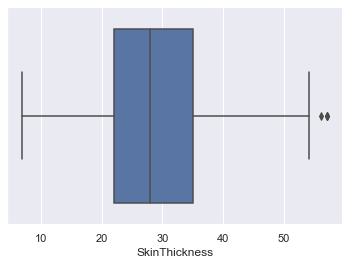

In [139]:
sns.boxplot(df['SkinThickness'])

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

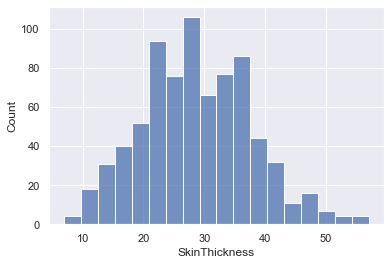

In [140]:
sns.histplot(df['SkinThickness'])

<AxesSubplot:xlabel='SkinThickness', ylabel='Glucose'>

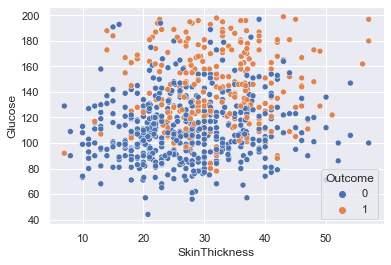

In [141]:
sns.scatterplot('SkinThickness', 'Glucose', hue='Outcome', data=df)

In [142]:
df['SkinThickness'] = df['SkinThickness'].apply(lambda x : 50 if x >= 50 else x)

<AxesSubplot:xlabel='SkinThickness'>

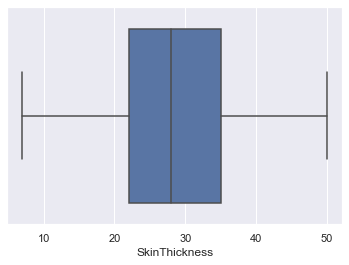

In [143]:
sns.boxplot(df['SkinThickness'])

In [144]:
SkinT = df[['SkinThickness', 'Outcome']].copy()
SkinT['SkinThickness'] = pd.qcut(SkinT['SkinThickness'], q=4,
                                labels=['Range 6-22', 'Range 22-28', 'Range 28-35', 'Range 35-50'])

In [145]:
pd.crosstab(SkinT['Outcome'], SkinT['SkinThickness'])

SkinThickness,Range 6-22,Range 22-28,Range 28-35,Range 35-50
Outcome,,,,
0,176,119,109,96
1,26,64,85,93


In [146]:
SkinT2 = SkinT.groupby('SkinThickness')['Outcome'].agg([agg.total_data, agg.total_true, agg.positive_percentage])
SkinT2 = SkinT2.reset_index()
SkinT2

,SkinThickness,total_data,total_true,positive_percentage
0,Range 6-22,202,26,12.87
1,Range 22-28,183,64,34.97
2,Range 28-35,194,85,43.81
3,Range 35-50,189,93,49.21


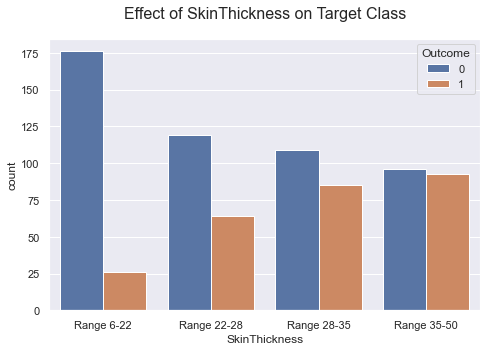

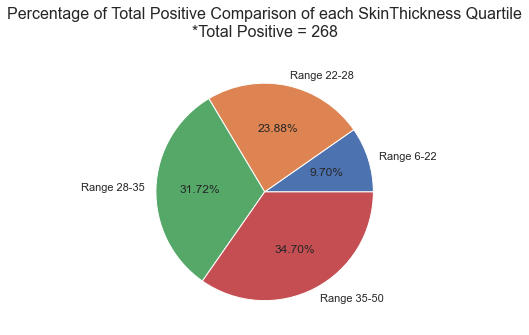

In [147]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.countplot('SkinThickness', hue='Outcome', data=SkinT)
plt.title('Effect of SkinThickness on Target Class', pad=20, fontsize=16)
plt.show()

print('\n')

plt.figure(figsize=(17,5))
plt.subplot(122)
plt.pie(SkinT2['total_true'], labels=SkinT2['SkinThickness'], autopct='%1.2f%%')
plt.title('Percentage of Total Positive Comparison of each SkinThickness Quartile\n*Total Positive = {}'
          .format(len(df[df['Outcome']==1])), pad=20, fontsize=16)
plt.show()

### Create Model for Predict Insulin

In [148]:
ins_X = ins_train.drop(['Insulin', 'Outcome'], axis = 1)
ins_y = ins_train['Insulin']

In [149]:
X_trains, X_tests, y_trains, y_tests = train_test_split(ins_X, ins_y, test_size=0.1, random_state=33)

In [150]:
X_trains.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
553,1,88.0,62.0,24,29.9,0.422,23
500,1,117.0,90.0,19,25.2,0.313,21
614,11,138.0,74.0,26,36.1,0.557,50


In [151]:
rfr = RandomForestRegressor(criterion='mae', max_depth=12, max_samples=20,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.5, n_estimators=300,
                      random_state=42)

rfr.fit(X_trains, y_trains)

RandomForestRegressor(criterion='mae', max_depth=12, max_samples=20,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.5, n_estimators=300,
                      random_state=42)

In [152]:
ins_pred = rfr.predict(X_tests)
mean_absolute_error(ins_pred, y_tests)

37.091791666666666

In [153]:
ins_result = pd.DataFrame({'actual' : y_tests, 'predicted' : ins_pred})
ins_result.head()

,actual,predicted
692,95,140.420000
610,158,93.111667
311,148,113.211667
467,100,111.318333
186,200,160.735000


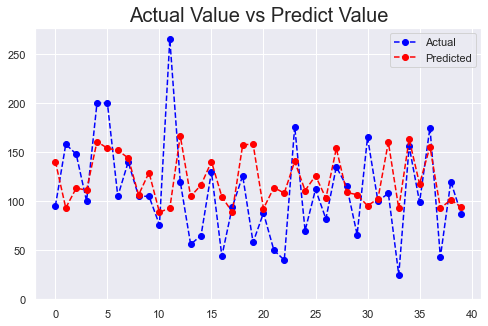

In [154]:
plt.figure(figsize=(8,5))
plt.title('Actual Value vs Predict Value', fontsize=20)
plt.plot(range(ins_result.shape[0]), ins_result['actual'], ls='--', marker='o', color='blue', label='Actual')
plt.plot(range(ins_result.shape[0]), ins_result['predicted'], ls='--', marker='o', color='red', label='Predicted')
plt.legend()
plt.ylim(ymin=0)
plt.show()

### Lets Apply Model for Predict Insulin

In [155]:
rfr.fit(ins_X, ins_y)

RandomForestRegressor(criterion='mae', max_depth=12, max_samples=20,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.5, n_estimators=300,
                      random_state=42)

In [156]:
feature_ins = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
c = []

for i in feature_ins:
    c.append(f'df["{i}"].values')

c

['df["Pregnancies"].values',
 'df["Glucose"].values',
 'df["BloodPressure"].values',
 'df["SkinThickness"].values',
 'df["BMI"].values',
 'df["DiabetesPedigreeFunction"].values',
 'df["Age"].values']

In [157]:
Insulin = []

for a,b,c,d,e,f,g,h in zip(df['Insulin'].values, df["Pregnancies"].values, df["Glucose"].values,
                            df["BloodPressure"].values, df["SkinThickness"].values,
                            df["BMI"].values, df["DiabetesPedigreeFunction"].values,
                            df["Age"].values):
    if a == 0:
        Insulin.append(rfr.predict(np.array([b,c,d,e,f,g,h]).reshape(1,-1)))
    else:
        Insulin.append(a)

In [158]:
df['Insulin'] = pd.Series(Insulin)
df['Insulin'] = df['Insulin'].apply(lambda x : float(x))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,148.0,72.0,35.000,164.956667,33.6,0.627,50.0,1
1,1,85.0,66.0,29.000,97.495000,26.6,0.351,31.0,0
2,8,183.0,64.0,21.475,152.485000,23.3,0.672,32.0,1
3,1,89.0,66.0,23.000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.000,168.000000,43.1,1.200,33.0,1


<AxesSubplot:xlabel='Insulin'>

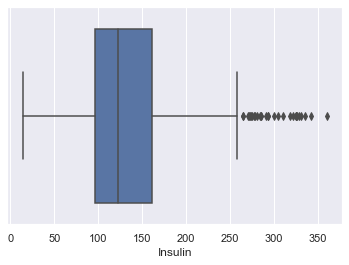

In [159]:
sns.boxplot(df['Insulin'])

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

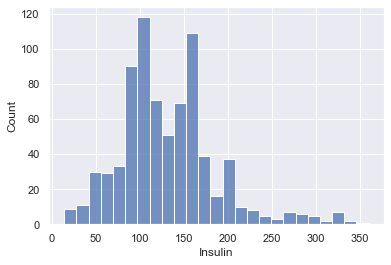

In [160]:
sns.histplot(df['Insulin'])

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

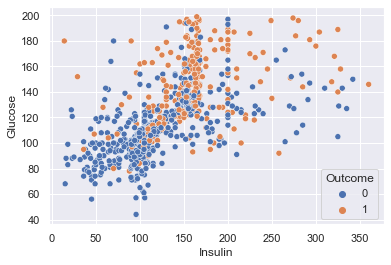

In [161]:
sns.scatterplot('Insulin', 'Glucose', hue='Outcome', data=df)

In [162]:
upper = df['Insulin'].quantile(0.75) + 1.5 * (df['Insulin'].quantile(0.75) - df['Insulin'].quantile(0.25))
upper

260.1545833333333

In [163]:
ins = []

for i in df['Insulin'].values:
    if i >= upper:
        ins.append(253)
    else:
        ins.append(i)

df['Insulin'] = pd.Series(ins)

<AxesSubplot:xlabel='Insulin'>

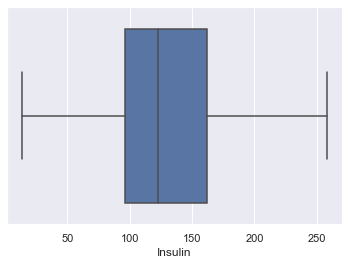

In [164]:
sns.boxplot(df['Insulin'])

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

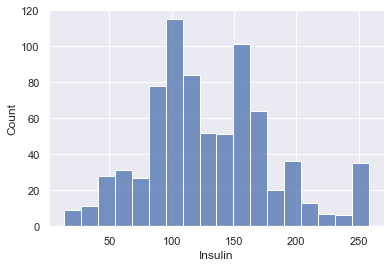

In [165]:
sns.histplot(df['Insulin'])

In [166]:
insulin = df[['Insulin', 'Outcome']].copy()
insulin['Insulin'] = pd.qcut(insulin['Insulin'], q=8,
                             labels=['range 13-76', 'range 76-95', 'range 95-107', 'range 107-122',
                                     'range 122-148', 'range 148-161', 'range 161-191', 'range 191-258'])

In [167]:
pd.crosstab(insulin['Outcome'], insulin['Insulin'])

Insulin,range 13-76,range 76-95,range 95-107,range 107-122,range 122-148,range 148-161,range 161-191,range 191-258
Outcome,,,,,,,,
0,91,84,81,65,55,47,31,46
1,8,9,15,31,41,49,65,50


In [168]:
insulin2 = insulin.groupby('Insulin')['Outcome'].agg([agg.total_data, agg.total_true, agg.positive_percentage])
insulin2 = insulin2.reset_index()
insulin2['positive_percentage'] = insulin2['positive_percentage'].apply(lambda x : float(x))
insulin2

,Insulin,total_data,total_true,positive_percentage
0,range 13-76,99,8,8.08
1,range 76-95,93,9,9.68
2,range 95-107,96,15,15.62
3,range 107-122,96,31,32.29
4,range 122-148,96,41,42.71
5,range 148-161,96,49,51.04
6,range 161-191,96,65,67.71
7,range 191-258,96,50,52.08


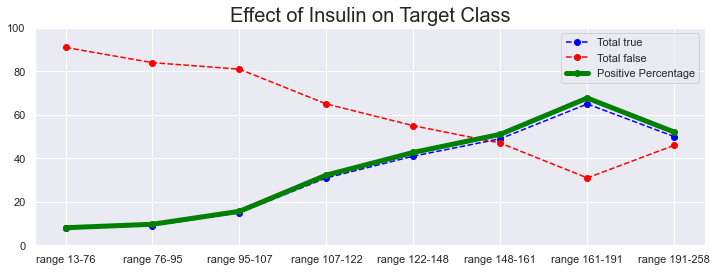

In [169]:
plt.figure(figsize=(12,4))
plt.title('Effect of Insulin on Target Class', fontsize=20)
plt.plot(insulin2['Insulin'], insulin2['total_true'], ls='--', marker='o', color='blue', label='Total true')
plt.plot(insulin2['Insulin'], (insulin2['total_data'] - insulin2['total_true']), ls='--', marker='o', color='red', label='Total false')
plt.plot(insulin2['Insulin'], insulin2['positive_percentage'], lw=5, marker='o', color='green', label='Positive Percentage')
plt.legend()
plt.ylim(ymin=0, ymax=100)
plt.show()

Since the total data is close to 100, the percentage will resemble total_true

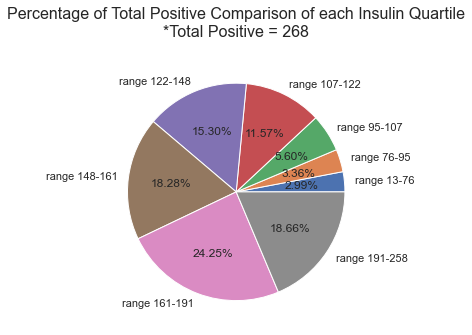

In [170]:
plt.figure(figsize=(17,5))
plt.subplot(122)
plt.pie(insulin2['total_true'], labels=insulin2['Insulin'], autopct='%1.2f%%')
plt.title('Percentage of Total Positive Comparison of each Insulin Quartile\n*Total Positive = {}'
          .format(len(df[df['Outcome']==1])), pad=20, fontsize=16)
plt.show()

# Standarization

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
scaler = StandardScaler()

In [173]:
scaling = scaler.fit_transform(df.drop('Outcome', axis=1))

In [174]:
tes = df.copy()

In [175]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [176]:
df_new = pd.DataFrame(scaling, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [177]:
df_new['Outcome'] = df['Outcome']

In [178]:
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.121174,0.865276,-0.030632,0.714095,0.679252,0.180395,0.588927,1.445691,1
1,-0.785268,-1.205989,-0.543914,0.037102,-0.644807,-0.868834,-0.378101,-0.189304,0
2,1.329763,2.015979,-0.715008,-0.811961,0.434472,-1.363470,0.746595,-0.103252,1
3,-0.785268,-1.074480,-0.543914,-0.639892,-0.713403,-0.643999,-1.022787,-1.049828,0
4,-1.087415,0.503626,-2.768136,0.714095,0.738982,1.604348,2.596563,-0.017199,1


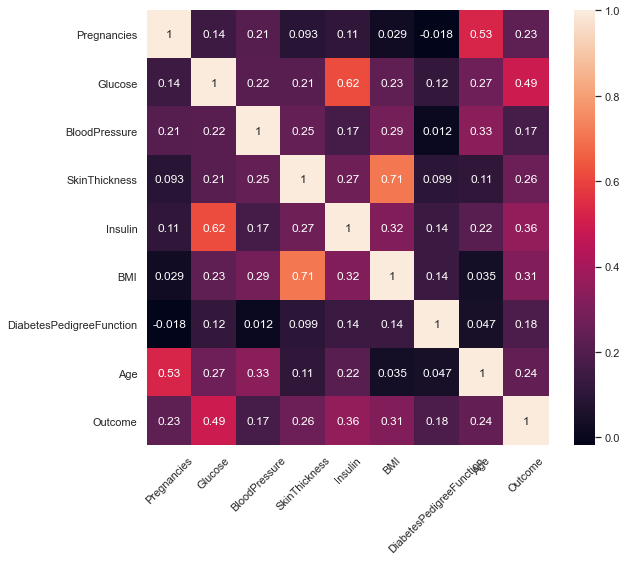

In [179]:
plt.figure(figsize=(9,8))
sns.heatmap(df_new.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

In [180]:
df_new.to_csv('ready_modelling.csv', index=False)

# Machine Learning Modelling

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [182]:
X = df_new.drop(['Outcome'], axis=1)
y = df_new['Outcome']

In [183]:
smt = SMOTE()

In [184]:
X, y = smt.fit_resample(X, y)

In [185]:
y.value_counts()

0    500
1    500
Name: Outcome, dtype: int64

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33)

In [197]:
def result(nama, y_pred):
    print(f'Results of Machine Learning Modelling with {nama} Algorithms\n------------------------------------------------------------------------------\n')
    print(f'Accuracy Score :\n{accuracy_score(y_pred, y_test) * 100 } %')
    print('')
    print(f'Confusion Matrix :\n{confusion_matrix(y_pred, y_test)}')
    print('')
    print(f'Classification Report :\n{classification_report(y_pred, y_test)}')
    print('')
    print('')

In [188]:
# Random Forest Classifier

rfc = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=450, min_samples_leaf=2)
rfc.fit(X_train, y_train)
rfr_pred = rfc.predict(X_test)

In [189]:
# Support Vector Classifier

svc = SVC(class_weight='balanced', random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [190]:
# K-Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='euclidean', n_jobs=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [191]:
# Naive Bayes Classifier

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [192]:
# Decision Tree Classifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_leaf=1, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [193]:
# Logistic Regression

lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [196]:
result('Random Forest Classifier', rfr_pred)
print('')
result('Support Vector Machine Classifier', svc_pred)
print('')
result('K-Nearest Classifier', knn_pred)
print('')
result('Gaussian Naive Bayes Classifier', nb_pred)
print('')
result('Decision Tree Classifier', dt_pred)
print('')
result('Logistic Regression', lr_pred)

Results of Machine Learning Modeling with Random Forest Classifier Algorithms
------------------------------------------------------------------------------

Accuracy Score :
92.0 %

Confusion Matrix :
[[45  3]
 [ 5 47]]

Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        48
           1       0.94      0.90      0.92        52

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100




Results of Machine Learning Modeling with Support Vector Machine Classifier Algorithms
------------------------------------------------------------------------------

Accuracy Score :
87.0 %

Confusion Matrix :
[[42  5]
 [ 8 45]]

Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        47
           1       0.90      0.85      0.87        53

    a

### ROC Curve

In [200]:
import sklearn.metrics as metrics

probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

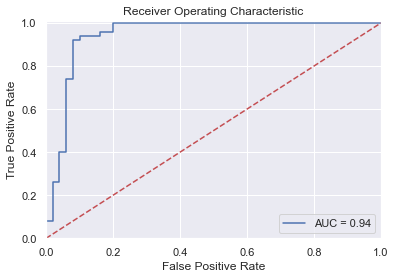

In [206]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion

### The best model is Random Forest Classifier with 92% Accuracy! yippiee!


Honestly, it's quite hard to believe the predictive results of SkinThickness and Insulin, and that causes multicollinearity between the data. however I use it anyway because RandomForest is not affected by multicollinearity. And yes, the accuracy touched 92%.

Oh yes, this is my first published exercise after starting to study Data Science since January 17, 2021. Therefore, all suggestions and input from you are very meaningful to me. Thank you for taking the time to look at my source code. so, have a nice day!

From me, Rafka Imanda Putra